# Plate radiation

This is a sandbox to help build the plate radiation problem. The first test case will be the simple integration of surface velocity over the plate itself.

In [2]:
import numpy as np
import scipy as sp
import scipy.special as spsp
import matplotlib.pyplot as plt
import numba as nb

In [1]:
!pip install numba
!pip install -U scipy

You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.5.4)
You should consider upgrading via the 'pip install --upgrade pip' command.


# Case 1
## Junger and Feit

this will be a imple integration using the equation rom Jungeand Feit inegrated into spherical coordinates of 
$$ p(R,\theta,\phi) = \frac{2L_x L_y \ddot{W} \rho e^{ikR}}{\pi R} j_o(kL_xsin{\theta}cos{\phi})j_o(kL_ysin{\theta}sin{\phi})$$


In [39]:
# define plate
L_x = 0.3
L_y = 0.3
w = 100000
rho = 1.2
R = 5
phi = np.pi/2
theta = np.pi/3
c = 340
freq = 100
omega = 2*np.pi*freq
k = omega/c

@nb.njit
def bessel(x):
    return np.sin(x)/x

@nb.njit
def baffled_plate_simple(freq,R,W,theta,phi,L_x,L_y):
    k = 2*np.pi*freq
    return 2*L_x*L_y*W*rho*np.exp(1j*k*R)/(np.pi*R)*bessel(k*L_x*np.sin(theta)*np.cos(phi))*bessel(k*L_y*np.sin(theta)*np.sin(phi))


@nb.njit
def freq_loop(freq_range,R,W,theta,phi,L_x,L_y):
    values = np.zeros((len(freq_range),len(theta)),dtype=np.complex128)
    for idx,freq in enumerate(freq_range):
        values[idx,:] = baffled_plate_simple(freq,R,W,theta,phi,L_x,L_y)
    return values

In [57]:
theta_range = np.linspace(-np.pi/2,np.pi/2,180)
freq_range = np.arange(1,1000)
angle_sweep = freq_loop(freq_range,R,w,theta_range,phi,L_x,L_y)

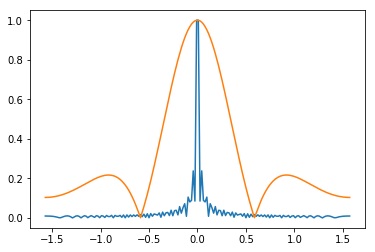

In [59]:
# plt.figure()
plt.plot(theta_range,np.abs(angle_sweep[58])/np.max(np.abs(angle_sweep[58])))
# plt.plot(theta_range,np.abs(angle_sweep[480]))
plt.plot(theta_range,np.abs(angle_sweep[2])/np.max(np.abs(angle_sweep[2])))

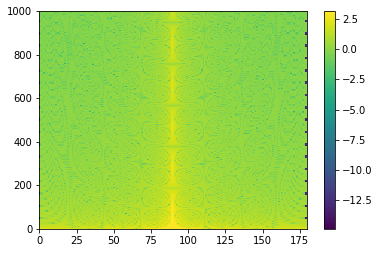

In [60]:
plt.figure()
plt.pcolormesh(np.log10(np.abs(angle_sweep)))
plt.colorbar()

# Apply to a plate radiation modes

Using the plate 

In [61]:
m = 20 # number of elements in x direction
n = 20 # number of elements in y direction
freq = 100 # find at 100 hz
c = 340
rho = 1.2
omega = 2*np.pi*freq
k = omega/c

In [63]:
dx = L_x/m
dy = L_y/n

In [ ]:
for s in range(m):
    for t in range(n):
        for p in range(m):
            for q in range(n):
                